In [1]:
!wget https://s3.amazonaws.com/video.udacity-data.com/topher/2019/January/5c4147f9_data/data.zip
!unzip data


--2024-04-03 15:00:48--  https://s3.amazonaws.com/video.udacity-data.com/topher/2019/January/5c4147f9_data/data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.36.24, 54.231.228.56, 54.231.129.72, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.36.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113826 (111K) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>] 111.16K  --.-KB/s    in 0.007s  

2024-04-03 15:00:48 (15.2 MB/s) - ‘data.zip’ saved [113826/113826]

Archive:  data.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/file_information.csv  
  inflating: __MACOSX/data/._file_information.csv  
  inflating: data/g0pA_taska.txt     
  inflating: __MACOSX/data/._g0pA_taska.txt  
  inflating: data/g0pA_taskb.txt     
  inflating: __MACOSX/data/._g0pA_taskb.txt  
  inflating: data

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os

In [3]:
csv_file = 'data/file_information.csv'
plagiarism_df = pd.read_csv(csv_file)

# print out the first few rows of data info
plagiarism_df.head(10)

,File,Task,Category
0,g0pA_taska.txt,a,non
1,g0pA_taskb.txt,b,cut
2,g0pA_taskc.txt,c,light
3,g0pA_taskd.txt,d,heavy
4,g0pA_taske.txt,e,non
5,g0pB_taska.txt,a,non
6,g0pB_taskb.txt,b,non
7,g0pB_taskc.txt,c,cut
8,g0pB_taskd.txt,d,light
9,g0pB_taske.txt,e,heavy


In [4]:
# print out some stats about the data
print('Number of files: ', plagiarism_df.shape[0])  # .shape[0] gives the rows
# .unique() gives unique items in a specified column
print('Number of unique tasks/question types (A-E): ', (len(plagiarism_df['Task'].unique())))
print('Unique plagiarism categories: ', (plagiarism_df['Category'].unique()))

Number of files:  100
Number of unique tasks/question types (A-E):  5
Unique plagiarism categories:  ['non' 'cut' 'light' 'heavy' 'orig']


In [5]:
# Show counts by different tasks and amounts of plagiarism

# group and count by task
counts_per_task=plagiarism_df.groupby(['Task']).size().reset_index(name="Counts")
print("\nTask:")
display(counts_per_task)

# group by plagiarism level
counts_per_category=plagiarism_df.groupby(['Category']).size().reset_index(name="Counts")
print("\nPlagiarism Levels:")
display(counts_per_category)

# group by task AND plagiarism level
counts_task_and_plagiarism=plagiarism_df.groupby(['Task', 'Category']).size().reset_index(name="Counts")
print("\nTask & Plagiarism Level Combos :")
display(counts_task_and_plagiarism)


Task:


,Task,Counts
0,a,20
1,b,20
2,c,20
3,d,20
4,e,20



Plagiarism Levels:


,Category,Counts
0,cut,19
1,heavy,19
2,light,19
3,non,38
4,orig,5



Task & Plagiarism Level Combos :


,Task,Category,Counts
0,a,cut,4
1,a,heavy,3
2,a,light,3
3,a,non,9
4,a,orig,1
5,b,cut,3
6,b,heavy,4
7,b,light,3
8,b,non,9
9,b,orig,1


<BarContainer object of 25 artists>

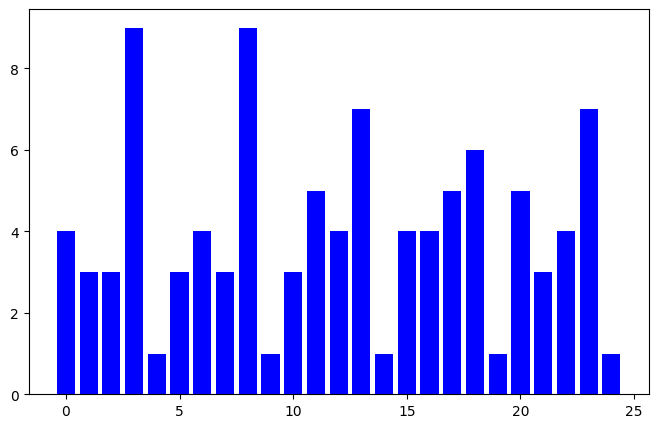

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

# counts
group = ['Task', 'Category']
counts = plagiarism_df.groupby(group).size().reset_index(name="Counts")

plt.figure(figsize=(8,5))
plt.bar(range(len(counts)), counts['Counts'], color = 'blue')

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def plagiarism_detector(doc1, doc2, threshold=0.8):
    vectorizer = CountVectorizer().fit_transform([doc1, doc2])
    vectors = vectorizer.toarray()
    similarity = cosine_similarity([vectors[0]], [vectors[1]])[0][0]

    if similarity >= threshold:
        return "Plagiarism Detected! Similarity: {:.2f}".format(similarity)
    else:
        return "No Plagiarism Detected. Similarity: {:.2f}".format(similarity)

# Example usage
document1 = "The quick brown fox jumps over the lazy dog"
document2 = "A lazy dog jumps over the quick brown fox"
result = plagiarism_detector(document1, document2)
print(result)


Plagiarism Detected! Similarity: 0.96
